In [26]:
#imports
import tensorflow as tf
from tensorflow.keras.models import Model
import tensorflow as tf
#import tensorflow.keras.layers.BatchNormalization
from tensorflow.keras.optimizers import SGD
import os
import pandas as pd
import numpy as np
from tensorflow.keras import backend as k
import matplotlib.pyplot as plt
import cv2
import tensorflow.keras.layers as k
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from scipy import ndimage
import scipy
import itertools
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras import backend as K
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from skimage.feature import hog
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import  MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
#from tensorflow.keras.callbacks import TensorBoard

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [27]:
import cv2
import imghdr

In [28]:
data_dir = 'data' 

In [29]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [30]:
import numpy as np
from matplotlib import pyplot as plt

In [31]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 4578 files belonging to 2 classes.


In [32]:
data_iterator = data.as_numpy_iterator()

In [33]:
batch = data_iterator.next()

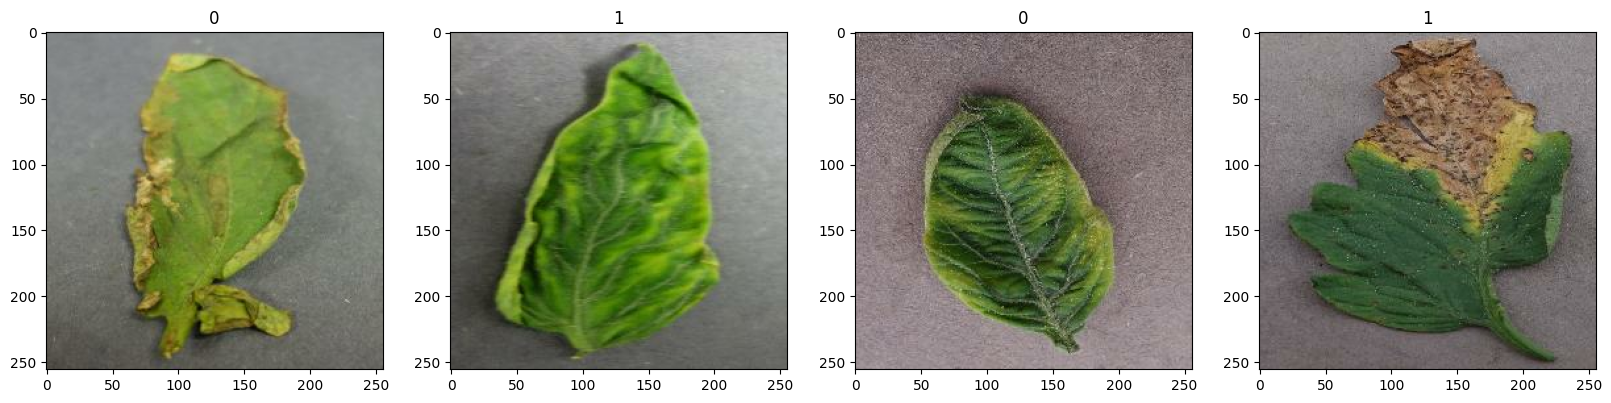

In [34]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [35]:
data = data.map(lambda x,y: (x/255, y))

In [36]:
data.as_numpy_iterator().next()

(array([[[[0.49803922, 0.4627451 , 0.44313726],
          [0.49803922, 0.4627451 , 0.44313726],
          [0.49803922, 0.4627451 , 0.44313726],
          ...,
          [0.5921569 , 0.5647059 , 0.5411765 ],
          [0.6       , 0.57254905, 0.54901963],
          [0.6117647 , 0.58431375, 0.56078434]],
 
         [[0.48235294, 0.44705883, 0.42745098],
          [0.4862745 , 0.4509804 , 0.43137255],
          [0.49019608, 0.45490196, 0.43529412],
          ...,
          [0.58431375, 0.5568628 , 0.53333336],
          [0.59607846, 0.5686275 , 0.54509807],
          [0.60784316, 0.5803922 , 0.5568628 ]],
 
         [[0.44705883, 0.4117647 , 0.39215687],
          [0.4509804 , 0.41568628, 0.39607844],
          [0.4627451 , 0.42745098, 0.40784314],
          ...,
          [0.6039216 , 0.5764706 , 0.5529412 ],
          [0.6156863 , 0.5882353 , 0.5647059 ],
          [0.627451  , 0.6       , 0.5764706 ]],
 
         ...,
 
         [[0.5294118 , 0.49803922, 0.49019608],
          [0.53333

import base64
import io
from PIL import Image

base64_string = "/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAEAAQADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDdxnOB26nof85p29cfL8o5x2GKaVyMcZwM0pXA5AU9cdSaBik7enQ45NIpYAlhgkcA8ZoYgDAyW3du1D/KBjt2xxQA4NhuBnPt1+lG7+6Dg84znBqLBL4GMc9PWlyFHPOO4xQAkjiJd8rADpuJAx+fFU4tQs538tLmIyByojZsMT7Kce/5VLfwPcWUsa8uyEj+eK45IWKCTy2cIOY+M5HUfWuetWdO2hMnY61pliCnd8wGTz1/ClE442kLg9cA9vyrjo5reFBNGZ4DuPCkhcnrkevHcfrU0d1dRspSfzUx1YY3fjTjXT3VhyfKrs6+N3LNhSF7ZGf0p+WypO3A+8MZ5rm4dfeBttzHtToSv3a2bPULa5jDRup4wOn9K2Uk9gTT1Re3gsGUEjtzz9KjAYsHxtbqfbmkVkT5mbPPb+lOBVlJYAk/n/nNMY3YY03Fs4Jzx157e3+NNAYsq7x0yd3f/CpTkMAGAYjDYI4/pUZLFSxbjI7Y4oGNOAmOMZyeO/8Akfypqnj+BR045z+P4UsgVsoyg5PPXJ/z1qMBYz8qheCB8x5pAJISZgoAyvpzTlZo3+VQAT0Le3QenSjcB85GN3PTrzTZJMk85POTk5P680wAnAG4Etjpu47VCBubBXb83VV559qnb7hbBYjn5zio9oZhnkE9R/nnt+dAFdztbBIVSOG5P1P58/54UqWUgA55yAOB7n8T+lDfJ8uM7uoII/WlOQh5Kr1bsc4oARmYsqqVUHkq3J7UHaQcc5G0D0GcUiZU+WEChfukr+Hbt/8AWpSrKCgU4Gc5IA/w60gGEbvnQZCcZ35Cn8P88UzcF7tsIHA+vPOfwqWRW3A+ZtBHPFRtGrsAzF1I4AXOBnt/nFABsLtjaCzcgkdvTvTHw2FAU7j9QfSpEClucDA9cAY78UzYoJAIYnPGO3f+lAEZxsDbOhBPfA5+lCHzIyT1Ht159KkPlL1HznBHrj3/AM+lNKsCx5YhcsScfzoA6RyBweM9qT7w+b5enalDgAsQT25NBYDHAyRjGOtMBOjAZGMkEe1PC9AuCRxnOaYuQp2/TGKcOeTwMfSgQwsAMHp0+v8AhQ+8MDyR784PvTsAA7cgZ6nP+TTuCMEg5Pc4OaAIwmFJDEHPAHc1y9xEtvqlyxVgHO9SScZIyQO3r/kV08kyxlmYH5fbFcfqd5I1wsYEefvHjdyRnv8AXr1rnr6pRFKSS1ZTunDTFljwWAII5LH/AD/L16xW0sixPu+Ylup6+1RyOJJTuOOwHY07dGiZJxu4LEgZ9/rnH1z9c5qFjicpPQesxW8jVydgU4HucYyPpU8skLSiS3zbknJ2f1HQ/lWbIAM5Y5yeRz/kVPbL5pJLAKFzgnrxkfSrStsVGpKKsjZtdae1kCXi7owP9avTHuO1bsM6zRgoU2Hn72Rj1rjJLvy2K5GFB49/bj6fpUFvf3Nud1mxBVsmMt8p+nbPerjN9TaFVNe8egq4AOXbcTzgg8c//rqOfKKCyg4GMn9ePpisvSNch1KAqAqzL1Un+laiyFgQC2zoevPetbmxHyCRgjnBz059KdnH3VB9u30/WnIVJG9QDn7ue3/6hTmYj5tvzY6H1OM4oGQncyDgZI55IGPrSKq7uc7RxyO/tTlyoVnK5xzg+1IVDoGwNy4Gf1/woACinB43FcZPOOaBGPNAZWOMEkjr7H8qXO8YbIxknCgg9u3OcfypUI38lUGCRk55/GgCNVC/MQzZODg/5/yKjmXfGV3ZJJGcjp/nn/8AVU2Qw3fL0A4HI98/561Au1gyhGDnHIyMg/8A16AGS/vDx8gGDjOD/k0+R8Mu5lCtnK/n7/Whl3uVGWO77w557/pxQWXOVJw2eGGeev4UDGDM+M4Ab1Occ9KczyHcW25PDD8z6enP40BVQrtVlB4xzxShCZAjK+7IwCc5GP6YoEROA6nfwBg4BJB6kc/hRvUurHLFeT9T68cfj6094ivLhgdgPJOOT06+pPSmKoZywZzgH2z75oAjwvUZwcnDDOf0p6kbXUKcbSTwevTnH+femhPL44BPHzckjnPtSor+ZIWTYxHIGCRnn/8AV9KAOjXlcOSGIA6dKXaFOGzk9gKUbVQZ6k80zIfdyMDuc8e9MBoGMdD64HSgkFt/4YB5pFJONqHb7/Wn4Y/xfdOSKAIpGjDYBxzjkVLwxyPvdcfT1pMmSQ/JknA5zxQNqhs4GOx70AZ+rPJHbqg6M2GPWuGvZWtpwzRqRnDEdR/n+ldZrL/vAMnYoycnOSe34Y/WsC/g8yQ7enfBrBq8mclZ+8UjFsuX8p0kj7OMgEZ4IyAcfX2zTJYB5iOiKSODyRnJ79+c4+lXY4ytupZl3rx64H+f5VCd6SthwNxyvy+1NozRXt4JHuJFkKFQeDnGQRkdfY/n0p1xGFQgEBVJPB4FWpsKj7grHI5XjHAx+lULi4dT+8O/yziP0Tr29O+P8aVg6jIj58DbnV5g3GWHTsT+tUZLhQSrA4H3cDOTnHPPAx9eamRGTUscrkMrKW7DnH5jFVZjtLhEG7dxge//AOqhopEjSzRTrOkhjdedrKOefzrr9C15b4KJciReMYGfwrh3bfDIrLlM8HPIPp/9eljnkt3SeMsHHGemfz604ytobwnbRnrCkMjOSuOeTztPShmVyfmDADnBHH/1v8aw9F1c31uMEAj72W6GteJxM+xWZiD/AHen+TWpsSEqEAVec5G45/n/AJ6UiDbhlHJycKQT1H+NEm0OwLKdvJGMYH/6qmDKsf7z5VDfMcZz7ZyDnrQBDJgrnBYgYAHQZ4/wpocAM/UDjOCKa42/NFuGGwu7ryevfv8AX+lOZQrKhXDFQCCeR/k0ALyCGCYzycqTj6j0oDM5V1UCNCCMN9cnFIq/IoAUAsDx14xz+v6GhlDgEkA7cHIJBwfUfjQAgIBY4GX68Dgd+aikZtsh+ZWxxvGTz1FPdQEUnGAcfL06/wBf8KcQu4su4OenPP8AnP8AL3xQAwbWwAAGZsHA5+v+fekbcJVVjHwSNp4HXpiljIBfLNtXPbkH0/nTGEoVQEQEHaQxACjnJz1H/wCqgBrlnPUtySylDwPf8+tO8o42qu1TwQBnAz/+ulQMuY24yuTg5x14GaXlVRmGSGIOBg8c9O1AEJCocqQzqMk89Ovf/IzTVT5QXyfm7HI4+g/z/KWVQWX5FxgcqAOP6c5oZOSQhBI7n3zz3HH+elAHQvtJyME5zj/P0pAVU4B3Eds9KeyqRtAwPXP86YVUuuAeBnI4DZpiF3dORk9scD/PNMIHBHBx26U9QpfaSR1HHrikwFblgWHXmgBm5sbTn5s8EZz/AIUwg7AVT5uMBif896kcIFOCBjkE1G8jcgDjtjmkBzerTLJdsmGwg2gZ/rVEqDCuxz6ntj/OamuS6sdyg7sgFhn2qqkhb5RtwWzggcfX2/8Ar1kjhk7u4zyEYjIZWLDGOGPpj9annjhRGDEFlOAo7gd8+/p/KoHyjEFQWGcgnp6UjMrABgwKEAHOBjvx3ptXEmRTbGsnfJJYgrkknAULn8wf1rJJMkZUKx2jaRn8gKuJLl51I3bPlPGABnKr+PzmsobvtZ5wg5Ug87jj8/ShDGySNDcRSdWEmScZ4PH8jU0turyk8ncASpGOT159OnNU5Tunj3Jn96vTBzz0961p0YFNylcjcSRkDP8A+sfnmkDZnqGi2BVBG7BUg4Jz3x2qpIj+Wzhiu1gMk9/Y/StxVARTwSfXgDn68fjWfexlQZSCydNvXj/H/wCtQVGQzR9Tay1NCJNyMPmIz1I+nrXpFtciSJCoyByDmvJJYjGW7AHB+YZH9a6vw7qW8LFI2GGBz3HH/wBetEzqg7o7xpAIxyN4Py4xk+386ar5k3KOQDnjiqayfdG4BdwUjOcjn8uv+cVZALkp97rkY4x2zTLJNq7owUO1uwHpx6//AF6iBZZQ2X2npg4Pv/n2oDBAWCjqcdTgf5z0qOQzRsXKMUYBRxntz1/z070ASKIi/mRK2/dxnGeuAM/j2/xpZGZWy2xVJCgjp7A5qFBgKzZIXjpnd+PftUk0jAOTliByc8Y9cUAAzubchbnGG4weOvFLhmdhgAkA7jjjntn/AB703qGcx/L1IUjJ/D6/zphAIVgZOOvb2Of0/wAmgB7JtlUOvzEZ9yeP06fnSbiUOd2OVPzcH8P1/GgspJBDFj1AxwD2x9f89coWLMowTgYxkZIHTH6fhQAgcHMfy9OF6GmhwWXacsR1GSPr+J57U1dkhyGAAPBzgnH0/GnuuGPkgZOCpI/z/kUAKf3akEgEgEkcemD79ahw33Y2Q+ykk4/z9On0pwBdCDtXjBA7ZHP8/SmOfLQOcI3YEcD06UwOqONwUk0HGw9AMY5poIGSOcdDijk7cHI9RjJoECgqxB7nuPzx60zCsARlge2elNZycEcZHBPUU0NkH3Gc46etADjnGF//AFf5/wAKgldY1PGcngHv+lP8vKcDGO/p69/rSuI1iCnG0/Lz39OlJ7ActerIxJIUt1AxnHtVb+JVYIx28gDvk4B9fX8a0LpwrYQcA42ng/8A1qoSkL0J3Hseh9efasIvQ4XuRXAzEWx0IyM9T2/DrVO5kVdzREMOwK7TnuMZPA9zz14rQ3xInIBTOCTxx9M+n1rPuVUorYwrAbscn/P+FXcTMxJla6curFCuQm7B3DkHv2yPU5qO9iUTMAy/UZHfk0s1uwdJIPvxkMN3IP6VPdqbmzWVVwR+PHbP4EZ9xipTGYWHNxGibWbqDxx3/PitmRidzMMAc57f55rItQ7ahjLAjP4HGP61pAmSRY9m6RiAPm4HPqe1UORYjDLErrhl3DPA5P4/j/nimNuyfMbfhcgn069/fFWLZBuIY84yB1x1psoEbDONpGOB3z/jiglGK1sGhl8tSACBtY5Oe/p7n/Gq1jcm3uFlUgFDgjIHGf1rTZsADYpRgwJ5APXnI5Ptz2rFuFcSnd97qTjqc00zem9T0rS7xZo0YYPQgVqxhWUyZPPHTHQ8Z449K4Hw7f7R5eV3LnaSe1dtZyFlUgrt64A6+laHQXAiIAzg72GMBuP8fTpTpNrgsSFL8AduCev+FKkvHJLHljxyO3f64zSOcKASS23gA447c+vP4UhiFUB24wuNx59D/wDWHp1+tOQqG4LbnJYqe/6e9RIv77YeGAyWByevQ4p/3JQ6j91/c7egxj3xQAx2aJsSxhix6Y/z7fTNIi7ySckZwPmz2/WpywZGG0sd3p19CR36/Tn8ooWKIGcqNvzfKuD6/wA+3vQAFSZFwcnqFyMgfj/n+jdrLJhpMrwWX1wTx0579acyRkfOACvJJGSvX6d+f/1UjyI4VwAE9xgLnnv9RxTAURFVTa5C9csRz/n3ppGG3NwCcHtx9KV22YcNsbn5D278E98A9PXNIV2thD6EKexz1/z/AFpANMfmEAH7owc+hNMDDOVI6547dPzFLtDPuCqNyngHoSM8j8/yprSAoFBTft6Y4HTv6nkf5NAHTly+DxgjrTGxhc5JByfYf5xUoyV24yfRhk9O1NzuJbACnODTEQFHyoVeAOQOMcnmlZd5GBg+gyR/9epgQqHf8x9uuf0HrUe75sAnJyDxx0/SkAKNiEEByp7/AOelVbvcIHVQrEntxjnOf5Cp8YQAdOOeamtry0tULXG9iwI+U/w9SMD/ADxUVHaIPY4+4dnkYOMnqCWHFVJQHTEZBOMHnjI9619Suba8nwlukP8Ad5Azg8Z9/f8AlWbJ5W0rggE7RnGM/wCf6VnF3OCWj0ZQkbDlXADH14x34A/zzUYJiQxhdwJDEcnp/wDrJpZWeGTeQrhTkFlyPXHp6VX84sGU87zkHB5PpVCRYa2jljADkM6jk4yM9uKpLiGSazlLAnpuGOMnH0GSeMcl/atC3kaPAVyIyclWGAw6Z6/55+tYt9PG0hmVGV2YsTzyD1OfpWcmXFXTZTMJguDPtIOcBcHn/H/9VLHPKJGPK7TnptKn2rYuAtxFbyAFtvpyevQY7elZqRIpI28bSOemeucDFWhXLNq67PvfMR746/8A1qgupNjeXn5yenYj3/EVciQAZEYXHTvg/wCc1QuFlD7yA2OBxjOMk9v8802wirstwQn7DEGVRsHXnJ5zzn6449qxdRRlnJfIwOPftiuht2kKD7i4Rdp7gFB1xWTqkUjZOTtUFgDkAE46D9KlPUIu0jNtrgw3cbklee3GK7/TJyUU4Y55OTXnARmbyzjeT3PINbVheSxqE+0OidBkcVrzWR1e0SR6DHcAEAjAVRgZH+NWfPDA7W6YwuQM+9eftNcxx+atxJhBlfmJz9a3dC1tr5jHKoEiHqvT6iiMrlRmpbHSqu9jkEZAwce/T8vX0pmwtGeV3BcKGPtznOfX6dfWnrwgdAA+BjqNv1I9OOfemBCWLM5UHGdzEZ9OM+g6VRY4oeOAcrgjPXr3/Lr6VGqNEuVIJB5OeT+Pep3xGz7Bkqc7cc5GeO1RSKf3jMoB5O7PAOepoAiAYYjLBMAAAHpgdT+HapsjBG0Z7Ac8Ace/bp/+qozxub5WYk9effHH+eaVnUsSwZmXLbeRxj0A/wA4oGL5kTqo2MwzsG4DIHfOexz+R+tDMSMDOehPfp7f56UxhtABGCSDtI69Rjg++c03awIfHy543L157UCBi0aKqoWYYIXHXjGOM/5+tLGokBV2K5QcjBz+P0/lUiEbgBhgDxn0+maGRpW2NuYdcrzz7enWgDoSCuDuY+mD/n/IpDgDrl8c7ucGlZ89SqlQeD6VGvQkZGOODjP50xDtrIwIYj+8B1/Wmn5icqRgZU098BzhTjB4POKjdtq53fe6/wCGe1IBsikoG4OSBgY6c1m6o/lpGOuGKqGIIB9Px5/Kp72+ihAIcFlxk9O351iXWpgSCMlguQB6D/P+R3qJWkrEzs1YhZHJ8xQD7DPA/wAj9KhmdsMepAx8ygn04zxjirEmDCXLNjurdWB9iPT+tUL2R5HckqzKP7+CQPp16+lI4Stc3JjRj5e8YA+gHOPf046YrMubkP8A8e5wBxjjI9M/nT7i5UsAUyq/xHuRjHT3xWbI8qOsnKbsbTk845/qKkaRcivnXIwRgg81LdM0lsSzLjjvz1z0/wA/pzQLic7ozhhng9h6e1TwQyty3IUYYen1/wDrUnG5S0dx+lScvG/zSO3GcnBHOffge/T87rW7BsspHTt19/51QLC3YkEbduGJGcDPX9P1NbUc4ktRIw3EjYQCcehx9MUk2KWuotrGWVmkGFHOScbhwOPX6/WoL2CK4Tb1XkKoAzn1q3CQm0oeqlTnsMGmMEfcwwSc7Sue+f1qiDL06ZirW8gJdBgc4OOMdv8APNUdYUq+0dc4+Xn/ACa1orUQ3UjfKQ4ByTyRx6f54qhrcH7veASBgZ9B9KS3Ki/eOeAyQ+DgHk/X/J/WrkKF2AkAGeSFPUZx+HSqyLmQHoAc+o6+n5VcttsZG8EpxyAM/wA/61bNZGhvkeHZkklumP8AOO3QetM0dvs+t+WvHHOKbDJsdjvIPYsOozkfp/Km75LHWRMQCjHAbPB9RSjuOjpI9FjPyA4UEjO/d/OpAWkddwcOoIzn3+vtVHT7tJow2OWIbOOvr7VoRxk78EAMeRt6jA/Tv+OK1OoBiQg7SDgbd2MAH1pSFCshIPOBt/p+XT/69G1uGjXdzkYwOceg/GhhsUMqMSTkkYxjBoAhxIki4IAzuJbng54/Wgbi2CrB8DHuST/n8etPz8mSW2sCS7rzjP8A9b/GnDY0rDYzHkkbj689utAFdj5cpd24HHOOPxyPSpAiooiy7Z5LZ6dOnr0PWnqCo5+ZSSw7cdOn5en9CFXKljENgznnAP4dj2/woGVWyjcsw/hJ5GR+J4qVQrsu1k4HPIA//V1/+vSoRJHgfKRzgDA78+uOvNIP3J2oHI4JJx/+vtQB0ZK45wR6nIxULHeowQMZHXJ/KmEMWIU7FHUE4z/SpC7ZG8FVPPemITzCiE5Mg6jHH696hmeOQOJywAX39cVKIzuID8Dg8f5B/wA4pzAAsNxAbvng/wCfeplHmVgOZu4iDyRuByCDwT6549qz5A8cgZhgZwRjt/n+RrfvdPaVN6Ah+flJ7f5zWHIjQseGBbtnBx6HP4VjFW0OGcXF6jRcOEy5fIHUED6/Ws+7YRRM+5g0mGx049vz/GrrjcjhwMnnZz19evPSqUxMm5JFC9w2eSOO/c1RBgSSMozjAIxkjv8A5FNWXznC7QcAkY78Zz7/AP66uX1oImxj5m6HI7+vtWTJuhmLDp2yBjHag0RbUxxyKysV54YqTj39xV0TiQeWfkJHYZ9/6fyrK8yOQ/PhcDPy5/z/APrNXLUlXOQrcbRknj0PB/nxQJo0IrRCnzcnB4POc+9W7Ft4aErh+NrYHYfzwP8Ax01NAm+EnJJGBjPbp/UVnXM5t50crtzw+5jtHQg5GOAcfXFQ9yS8pMU3yBlkX5lIOCD2Ofw/lTlDgBc8hhtw33Rz0/H+dMuQbq2E1uCjtyQADgd/y71LFN/o+xSN6kAkZ5PTv6/1p3JsRT7g8IjLY756dOcZqPU4gbQsAu7GOg5yP0q6wJcSDJxySDnnGKr6lG0lpMMlQVwOOn+fSpuCZxwid+mHZm6D1BqcKVjYNtPPQN0/Lt/hViO2bymUnLDPfr9fWpBAGURBcBhk5GeB16d8/wAxVpm0nqNQ5ihbdt4AK9z25+matPaC/twu4I0WTvXkfp+A/wAkVUmJjZFCnC9V6DjtirFvHIlu6AMiycBiORjHA9+n6VMu4le6sX/D19KsjWzuSEbH6/WuwU8ZJDvnG5uPb156nn2rz7QJDFfyI2SC2c5ycV3duyuEdmLDGNp5B/z/AFroR2lvdl8MwA5yOmcccc+1R7dm4qqDe3I9eOef/rf0o/duSz8MDkMyjnp+Rp6nLqAjHGdy8c+ufXp096AGKRndwynp8/f25+v6UzIi3BTznkE5OaWWTHDNgDnHK9+wxz+FRS31ptIeZMLwdvH1HA57/rRdICwNqj55DuOCNo4x1+metMYMWYOqNnjGegxVOXVbKKNXd/3akH5Ewe3Tp/k01ry2R5E8xlIwQSOPbH6e/tU8y7jSuXZAm7KsrN0IB79cgenP8qb5rIrMgZR/CEAzx/Q/1pkM8NwgMcylQgyMkED0wcelShyN3bDA4IAwPp9f5VQHQPwxK9MZUDqaQqGC71GGz1GRx2/z7U+YGQDjoMjJ5B9/1odXbC+2OP8AP1piGJJEemSwG3dkH/PamzOMEgs4znHXOeaBnHzDJ3fK3p/n+lR8x5dm4C5+YdPegBSCIssw4PQcH8M1RvrWOWFpJDJJIV48vaOnrnHrnqOlRnxDpSvGGnzuHyYjJOO+Bj1FNXVLK4jytxEC3yIrERsecYIOCD0/MVlLllpfUGu6MW4ADDZGNuDhsDPvnP5VBIADuxgE4I/r6dulXb60ljlKj5oyeSeoP+f89qpuQm4y7wDj5iMnr6GovbRnA4tOzRlXUZ8scHdg9OBk45/L+lZN0GKmR8SNk/dGD+Pb/wDXXRTIkiNsDsD8wbBz/UYrMuIlACD5Qykngcc9PbtyOxqkwTsY7JGQVRtw+8eMEfh2qS1UonOcBiBxUUsBVyem4nGPWiO4KEljkHuTkj/P+epouXubtrOqjgAggHt9OuP88Vaki+0wNuTcf4u4rMgKrJuhY7unbofUfiPzrdgu90pkKkoSTkkHk9/0/WplqjNlHTJWuIWt2CZXHRskkcHqe/X65qSVXsphJuzCSQ209D1qtepJZX63cciOkpA5G0Dnr3xycH2zWz8l1AcqWidBwVOecdsZ/OpTHNWYqhGjWXsw+8Dg9uPyqveLiCVVAbqR/So7ZWsmMTP/AKOzkLzkqv5+uasFeSRncT0xjB+v+elCIMJFVC0YGCW6Hgfj+NJbRxNO5dlBGcZ6r7YA5B45qS8V/N2CTLNgEZzj8Rz6U8RiGNYkcMinPcd+evHr09TVtlXKsxLZO0DJwuevAH5dasQW0dzJCm8jByFH8z7dB+JpkqhRyB19Pxqe3VgquGGDyPXp0qZbaFRk4u6My8tv7N1eNUIYtye2feuzspjIiKfv8AYI45H+fwriLpt2vBI2VscsVH/1vQDrXU2rFbYGNMsoDc4wOM8jOTnI9PrWkZWjeTO2+l2bVzdbEbJRUK5G5gmc9sHJHX9aybvU35VcLk4dl6ke3aqV1cvJLskdstyCP4fp6VTnl/dngHHbNQ5uWxzzrX0iOkuZbiRi7MSRuzuz9ePzpjOGJVWKgjAI5pyoqfcyVUEZ6bvy/wA9KjXggZ5X7xHP8vw/xosY3uOMrBRkZAIO3HHrx+VWUlUfu3beo6DaQCM57YJ5/GqJfa52koC3QE/kKV1+SMDIZxjIGDn29/8A61TJKxcLuSSNPS7knVpMgESwj7g4O0gcD8zXTeu0qu7rn2+h+lcppEJXVZV3BliQBQDwS2c/yrp1B2FUAccbWbuK3hsdz3OnfmTcxG3OccdaQyBhsP1K85pm7aDtjx/eOM/hSNtHGz5uuccdP/rVZBI6EoCPuAfxDr7VWeLzYpPLAhlYbVkB5QnoQT7nNO8s+aX+YswAyP4R9Ke3zgeWN2OQMfoKBnmJty6RzQOu0KVZNu3DA4Pfjpx9aivbvzo442+ZkOCSQG/A1dvo103Ub5JMkzXLykDou7BAHtg/5xVOb7Lcg7GGSfpivLcb1NehlUqyjLQdb6obG3eBYldSSwLL0JGMkDGeKm03VnM4Nw8Z4JyMgg9ueP8ACs6SCRFIVN/H41AIkYhQNj5xsbI61rFNdTL20up0XnrK2Sdy5yeM1HNEZVJAAHuA3f8AlWVBcPD8j9MdRn/J9K0Ym27TGw2Y75I9uma2izAzJrZEMuRuIz2yAf696zZo0X5lB25z/wDqrqVAvg+5lVuSSDgkkVj3cRRm2ll2g5I4x/kHn8aotMp207BlG0nYM8dPTn1H866SzcSQALjp90MefQ89e/v+tc6ic7VxncTjsR/nvzWjaSJCEzu4POOnb3/z+NDEyzd25mhaMJwATxyM55/D/wCuas6NMptDbyZV0XocfKecgfjz/wACqeOQzQqzxmQDCj1znPHr1+prPjAs9bdixZZEIwBtycdu3TJx7dqgai7GhOi3dxJGMqFwFGMnjvS24fAR2IK/KTn8Mj8ar7mhvWCgKB1BOcc1oIPnWXIAPUf4UkzNmYYXjnldSMg8AA5yPQ9Mf/WqrIyxZ44BOCOPp0rcuIP3RYFcDqvv/hWPNDkZb5thxtAyB/SmMpR7pWLuqqoPToTnn8qsvfCytjdCJmKMoQqOcjpyDms+bzIt4KBR1BI4/D/PaqkFqbq8V23iBGJAJzuH07c5/OqtfctJbss2Nt+9muJgTNIc7Wb7uex9e1bUU0ioQg2q/wB7jBPbP/1/rUUJX7UXZQwC7Q2Tgg+3+f50+a5CgD7pU8HsRzSauEpyY0sDLjHzFupI569qhlyNzdQcY45prAzNuUMWJycEKAev0FPUEIhbczHALY6np/L8efwosSBR1RfNGCAMgZGMd+Pb+dRMxPJAIxjjAB45Puae8peMoceXj16c/wCNQgDO1lPmN93Az2P+fx9qpDGTSKmwMpPYj/P4U2W5CoX6I2cZ/wA+9OZMS5ONoGcbc44z/ntRBEl9qkNttyCc4A4PtTtfQuEbux0fh618jTI2O5pZMl+SMHjGf8961zzwWABGMBemO/X1/PNJGhjhBTkYxknP/wCunKJIiQ/GRyOwAI/PsfyrQ7TpAAV54OM8jrx2qMhQQclm6dOlSM5KgkkbflOCCc/hQRuI+YEMc4PU8f8A1qsRGTu3nkDceQueaaAcgld3GST6ewpSpDM+7aWbjGeMdeKTBVgScnJAAJ4Hp7UgM/UtHtdU+Sfcv+3EAGA+uCP0/nXD6xoK6bfJEksrIy/fKj72cccjNejkE7iuc4AIPYf5+vX0rJ162W4thghmj+ZUOB+AJ6H07evtlUp3V0tSZR5keeRxXFud53FM5Ge4qdp12KLiFWByAdoP/wBetWWzXy8gMqkZVSvOPx6VUcBVMciM0YyQfT6flXKpXONpp2ZWP2dmBhZlUNkJncPpT7bfGmz5cMc7t3AB7VGtqgYMjfKDnPr0xke3X8akhCebskweR1OP/r1d7A0SvKY3kJ+VV6NnGQAeaiuIW3FmwBnkgYOQen5j9Ku2nlz3M1vD+9aI7d4B5468gY7j9e4yXtnLZRtKNxTO0jbnA6/h39hmjnSdmHK72MYqQzKAcMc4zxnn86fHtbscdMnJGPX/AD/jU+I7l9nR1HzjOTjGc/Trz9KbGhiYSnPlnByuOR7ZrS4NNbmxbSZwPleUZYkrnryefWotYt/OjSdP3mxwXC8gjPYfmMVXSQiTaSuOpxxV+6kiazuImRmcrg478MST+Q59+ahrsOCcnYryBZ7SG7hdSSpBAz8uOnXqPSrVtNujI5Zxxxzj0qnorQy2zRQszRsi4SQ5YOOCAQOmNpzxwQO2ajVzb6osQPPJYAdOeM+vFK2pMotPU2SAIG4KnHSsa9wEbBwwU9G/z29K2XDdTtIOBycjr3rH1FQiONo4zzjHfNV0JRlqDcW2+TJIBO3Bx74H0pgYRZYYAzyAOmR/n86mj8s2bLENjKSSD1BycZP0x/hSWybXxyxJ+XuPp+lUiieEsiHP1LDue3X8KY0291CYC42sxGc/T1/znFSBCqZLfewQqtwBnuQaRt24orYK9AOfy/Tp70XAGCqmyIMDnJLHJz7n86QeY+GY4z3I+9T14RmyMoRxjqMYz/nB5qRFTy/kGRzzntn0NAELMRx27EgHFRsA6CUAFSCB3wM89qSdxIDDGzFz78cf/WoRfuICMD2B+v8AnimOwx1LIzuSFAySeB+dXfDNs0++5IUsxxlgOAB2/wA+lQT3Hlxm4V8kghAcEMTx0wc/068da3NDsTa6dFkKXxyc55/GnT1udNKKSuayYPGMSHIzkepz9Kk8zLkso+VSCAMHtnOKjdM4B3ZzjBPJ7cgUKN6FfnfsflyQe5/nWpsdIfLEIkYb8DHTnH1/xpxEezcqkE9sY/z+NBiUnBAABONv9KaiKGfapGONyjg/07/jVCFQJIuC4O7gbRkfn+dNKhRk5J4G3+tIFG485I74xnjigeaNy7iPp6f5/nQA0xsJGYsNvcE1A0KF3KMQ2/J3DPOAOP8APeplRFGxlLf7LZx9PSnM0LRAogPUnB644zn8/wAqQHOanBPbxm7SBpY2OZI8MWBPUqD/AC4/wzozaX0ObcS/NyA6f/XOPp/MGuulAIbZtc4IBY5x9fbPYVz3lQiBxF5aSli0wAwcnJGRz61x4iKj7yJnGLi20YZiYFowoBzz1Ib6/wCe1SPaoBgImf7pz3Hb+fPt71O0QhIMYVx3GfTiiMLHgcb2PBJxSjdo4iNIrlY3SJyh2hXZACyjj8s8e/NKZG8kLubYOBuBPfv+dPWGPf5ip3O478Z/Lr16+9SFASRlfu4GD+P/ANb86aiht9EZU6BIGh2+WGBP7sbeTnnI/OqdtEbbzI2djGzZJY5x6/j/AIe+a3Htz90fxZBY9PxzWW8BVx8g2g847H0/nVJW2DmexK0KmQmL7xOGUEn8s1egmZomRiSpHygLnFUInaLPynyyOqnleT/j0/UVciMios0RAI7huDxzz/n8KTEUtJuo4dVmjjkTLBd3Gfl3c/Tqp78CrMqLFqTsQGLHgEZ79arvFbi5WRkCI0bBto9FyMdfQfkauyojXRYbsvg4BPFIcrdDRLCG2Ib5upPy9Mev6Vzl++7cdm7kAH07HH589+lbVyTFprSFlGONmPmbjrnpXMQyCadgw+U5BJGT24/WrRMUPsIiEmGeARg+pIP68f1qyF8lflXAIy2Wycf57fSnhUC7cnA+UDHbv+PApJI1VgUO445Azkc9DxRuMXcHUB2ALdTjpxUYUqgyBjsCc08dCSxVAenTPXr+dV5JysZZM5/2jkf5/wDr0wsPMjmMk4B5wRye+P6VVaXzmEaqSxByB/D6frU0m+SMFc/NyQRyPcf57g0wRKrZXcrAZJbq3v70xgmY48fedRtDAD06n3/zxirAw6KFVQFHzFcgHqec/wCeKhKnawJOOpOeg/zmneYIwE3FQOgA/KgAuo98KOW4iAYocYYjH/6q6bSr43lok0S7NwCsoAyCM559PwrmyDOoiTcZXzjjPHv6dq6LS9OFjZMioU3MdxJ4z+NVDQ6aN7al1cMCnllQPy5p6tl8xhm2ttw6jn/INAZ0m4JyccjgHjrz+dRCTCjftUZ6eo/n1rQ2OtkbblcBmJ4B9cUju2TkHkA46fT605UJG4HJAyGIpj7264Gen179qokcQF6AYOCTjOPWmsoZAfLJB45A4/z/AEp20LtJIPGCcZ9M1FKBLyrAFmyPy5pDAqEGeCcDAHGP8KR9yyAfM2R1HP8ASgHaqjPB6bT7Y/lTHMcTZUncOoPc0AL5ZDMzKNxHJUc+36n9aoajZm5j2QxsJVGVOfvDPA+tW1kkMnyqGKZUgjgdu1JIplQ7vnyMEZweQe4pSSkrMTV1ZnImCVQJF5BXOByCOxogneDcschG5drgNj5T2J7jrWnq1q9tZyX1u4jlhVpJEblZB3Bz0PGc/XqTmse1uoNSjeWIbWC/PszjBOf5j+X0HJJOG+xzzouK5ojnmLSbxwxwAdoGf85psTZYlQ3+8R19aT96HwF8ws3yqByTnpS4XI25BJ4yMY9APrVJpnOWTLk45Uk9FGR7e47+vWq1xCJnLL1wMkGg7mfjlSOgPJ96nt2AZVIUiPLfMO+P/rCncZjvG0WOM89euKswSnDdyRgjJ56VcMUbA8nPU857daqtDsk5OBz1pNjuMmYC8glICqGAPsrZB+nU8/yqysTR28LM24qNjZ9RkHp9Kq3TNHa+aqn5CBnnB/Or0jhraV3UIVdic9s/N/X9Pep6j6FHU7olVt1G13GFOOlZdtGnKxqFB7EDJ9z71LezvwAuZpCcjHIUevtj/IxT7c+XFk5z13E5zz1FaBsrFheQFaM4xzgDP+cDr/hUeUZpAGPI6YAOcHnvU0cSEOGOHRd2w9cevX2qAxNktvwM8jd+X8/59KSYOLW5FI4ETbfnYnAAGP8APSmRIEDK65LnrtB28/Tjp196n37BhAQxGM4/z/8AXqB0H3mbnIPB4FMQnBG0EAnPX0pwG537/TAyKCd2DtKgjtxg/wD6/wCftTUUliei46Dv/nkfjQMZIQNwxuZgOnOKieQrACTukxng5IP+f6VZ2Bo1wh2Hr2/z3rOuuZo1QgyMcAY6c01qxxV2dnpNl9jsYy7O0i8hnbknsMf4YrTljAjYKV3bjn5T83+eOPpVay3S2yF1wCud2MDPvj61YZirMrkkDnagwfXnFbHcMhRcjcAD6lcg8H3/AM5pMIjDch3hecDP8vcVKShUkqMtyeQo6dc1FEMjgFGzkjOdw/wzn8/pQB1QkwFIXIBOckDp/k0116FGOc4wAMmnCJdu8AYB4/lSrkLljgHlc/L60xEDKJAd8Zyp4DLjP8/U0qozbgWU4655xUrNkD94o5AyRyP88Ux1IXIGAT95TnJ9OtACGNA4BZCccZ47Ujpgfe2nrgEDJ9KdtPIxnByD0zx/+umtuROACVJbHHXHv060wIywP3T2I4+akIUMAEAbGOf8/wCeacDkb0YBiCcA/Xn6c5qF1kDsEI3EA7T6cdP5dKQB9njldyJSEAztP8PGOD169zXN/YF0iSW2VsWjNmAZzjOSRn69vb3rpBCnloztvbsd2MD04/CmvHbTxESRgZyMn654Hr3rOrT542Bq6scy8JY7kO4EHII6f5xSNEHY5VTkHkDFac2nvatGYQxhyQSCSyn6d+/Tn2qFY4TLs85chtuGOCCO2D3FcT5qbtJHHKjJbGbsOwxozBMDC7z6Y/Km79jruwW69QQK1prPyslu/cjP+NZ86BT85LDHNVGaZFn1JWmVVUSopA54GCf88dfWq7tEy75gwTP3l5wfQ8e34/lVaR1lfzF3IOxLEAnr0pqwRXiyx/u2BHGWLFSDgZH1JrRWZcYrqF/c3FhJGqhcyYMZhk3AezYOPwP1IGKc4gto2k+YwCKOXaX56MuefZBxz06Vkx3jWYlEyyPA7gCTGMp2AUnAOMn8RRdyzSWLwYZiYlQPkEEB2IH02kf0o5bPyN7dEtCnbTPfXEssm4uzZGcdOf19/wDGtYIGZEQrgkZJOPxx+dUrNIoIFCxlmOCxPTcOfx/+v+NXWeRwX2nPOc8n8Kp6swnuOeTB55B49/8APtSTStKSzkZIAyoAHAx0HfgfXrUb8EO2cZAKjikODkcEdBt4zSRAixnPBIB6EHPao3AMmcjPZjz/AJ6VKeA2Q2PQ46e9OLE7diB1IORjnP59aYFWVZIyFIwedy4HA+tSoruBgYx3yCfyp8tvnB6Z5xjkf41JZ2E13ggvHHkENkEsMe4oSvsXGm5bEMskcUaIASxPyqBy3FS6fprT3H2mVDncAq88A1qDRYtm8lZcH5TnkY5/z+FaKwBEIkwSCcEbuD1Hcd+cYrWMLas6IU1HUEVViGGJAGfk7DPTIzTlQK3CqgJBJHJ+mf8APWlKpHGFY4BXgduR/wDW9KYGz8qqGGOjAnHp1qzUkUpGN6kOwPOOoH/66UACIbFwx4yBhf8APPGPSo5GZk2qNuTwu0nn2xx6U4TYhZgo3YwWI6+woA6lk3Egsc884poVjGBkgAjjBB9alkZexbO3tx+VMLBGZQGkGBjoc9famIYVUEA/MRyOMHnt7/4UPKRjBO0dc/59qjcEqeBnse3P48007lBBVhEOS4PUfgfxoAUHCFeuPlUZwophVllKZGDw2WBJGT1x/njFSqAXPUFQce31qMk+VujMb9QMjr7Z/wA/0pgKEADHcdmeQTheuccD/wCvTlfy1wFOOp4Ix06VHuIIWNxtY/MFb8B1qSIjYNx2gDOMDNICMh9v8WwZBynAx/T9M01S4k3rkNn5cfLk/XNPOY3JQBnzuLc8j0qNJHfnIIx0K46dcetAB5JYKQfmxgnPXNV2s7ed4fNRGKnvzjnj3Hap3bD4KZAGBj145P4/zpHBfcUGCv8AEQCOnt360AZUulM7k2t9cRlTgRyHepGMnIzk9SfWomsb5VkRHtJgnyklWjJ4BJ4z79q1yrb1hclgOu4g/TH1xSSqVUiLkEY9CPoB9azlShLdA9dzEezm5MtpkYG1YpCWJ+mB6++MVBcWPn26xNHHE7gZGNxPJGAcDGPp37Y56MFsOSeH6MW+8CeMioxhIwSyjeeGGM+p+nfipVGCdxKMV0MSLTFDR7RHuj+6NpJz0znsen1qtfaN9pGUlQSdgudrd8d/8muhBXKAiTf9AB/9Ycfy5psUaj5WVO2N6nIxnqe3WtHFNWBq6scZ/ZV3CfLe3yADkrzxyc8f54odhBH5k0hRFHzEnOf0rsmXCOrRiVWGflHXHPSmG0Uuyt5Y44Kgc9uW9Rj0rN0uzMnRVzlpIQRuIKjGRu69P/11E8Riz5rbeM9cV1ZsbVkO6Mbe7MMDOO/P1NRC1s4pGSO3RH28kLgcZwPwGalUpdWL2C7nPR20lxzBC7qxJG0HBP1PH61dt9Kmd0CssQxuI2b2P+en41u7mXEOMFBlcn5Rk4znntmgsyebJsLEKTs6kj0H+f61aprqWqUUZsWnwWrmWQmWQKCGfGfw9PpVmJIkBChxuAHHf6Y+hqYDbgZIbHDHn2xj60wcNnzGOTwM5H8+O9aLQ1EIwMqPujHy5x/nJPrTzlAzGQ/Lwfbn/wDVT33bAPkGc8hs++AOuaYpRSQOSQDhRjP9P/rYoAZgDCjJbAABOcfh3FPLR+WFBYc8df6/Wm/K0pKAqd2SFI+vXH/1vwoAIIPJU8Ddjj8uMf8A1qAI3VhIGDKSM9McDvSHapJAUrjb1x+X4etSD5o2CgccZJ+99KiXLKcJ8w5655/mRSA619quBwrdDt+lROHUgnJVjjoCP8/jVgwhxtJbfjuScVFtRtmQOcnGSOaoRGrqEyq7wByc0xmJ3bSTkkFSOR/nFSPCCobgEADPX1/TrQ0bZ2ncrewwOfSgBACw/h68DHOR/Kmgq5IAIVeOB1/KlhjVAqbWLE4BC4Puf8+hpHTzEyw49ABkexoAa7sFI2sAeM9z3FRuSG37W+YAbivr71KFxxGdqqcA49scUpAAfPznoQ33enp/nrQA0L68AkZ47Z/SmSoTGAu1SDwVHQ/54p5JEZkLAL2CjPTOahLMdqRgEk8gDBHoccYoAbI8gYhVG0Z6njn3+vFBZfNAjwcNjjjBz/nmpAplH3iuw4AwOnWoTGMrtAYgHjjPI9fXj/OaQDmkZGVgF24J+bPTnk/5/wDrNWJl3BsqcfKfQnoMjnHSn+W4jDMoZ1xgZC7enHt3qNsEFnkI28lc89ew/EUAOB/fqo3DcMDAGR7gdu9RJHIh27gflwCGDZJ4IxzjrUsQXaFUluhADZJ4x3oi3ct5ZVt2T1/Afp3/AP1gyFh50LYkZiMfKTjnP+P+RUaBxw3BU5IYAA8HqfXNWgCAdhAYLgnkDj/J59/aoihVv3ZbcT97v0/+t/L2oEAixwX+fGeBnJx6fl71G7EHhyckYCkDjOakaMRY2EsdvGD2zyDQWHmLweWG4AnPBPT8f50wIrkR7djEr0PIzzn+fHX15qKOPY5kDquSGOW4Ptz3P4VbUoibvlyuSSDnGePXvUIXrngDnCscfl+VIBkYV1ZGRzg+wHJ4I54ppHl7myc9Dxkj8SOmPapwGVF+UseMkseSe/8AP8qRQDJt8w9iCDjacjuKAIsvswQxyO7dB649P8ajGTGGBGVJChCM9B+NWWDsRuiTjqRnn6n6VCDtYMFwnQE8kdv8igYwGZmwNygjPzfX6igASx+X1Ujp3x/hwfzFKSrbgwXaFw20gZP/AOrH/wBemvEFyFYKrHjAxkA57fhigCIoyZjyc46hsD86kVi4HQ9/l9+Ov4UhBBDKMtnpj/GnMxZVfGFBOQCCR60ABVcHlQc4P1/zmmHAjAMhOWDFAcdz/SnAJgHYAR7YA6cCo3lGScRklhjjn69PwoA//9k="
image_bytes = base64.b64decode(base64_string)

image_buffer = io.BytesIO(image_bytes)

image = Image.open(image_buffer)

# Save the image to a file (optional)
image.save("output_image.png")

# Now, 'image' contains the image data and can be used as needed.

In [37]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [38]:
len(data)

144

In [39]:
train_size

100

In [40]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [41]:
len(train)

100

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [43]:

model = Sequential()

# Convolutional layers
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

# Dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 127, 127, 16)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 62, 62, 32)       

In [20]:
logdir='logs'

In [21]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [22]:

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Data Augmentation
data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

train_data_augmented = data_augmentation.flow(train)

TypeError: float() argument must be a string or a number, not 'TakeDataset'

In [23]:
hist = model.fit(train_data, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

NameError: name 'train_data' is not defined

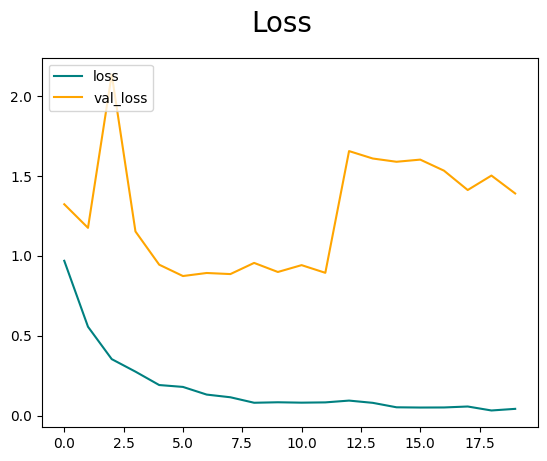

In [82]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [24]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

NameError: name 'hist' is not defined

<Figure size 640x480 with 0 Axes>

In [25]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Found 4578 files belonging to 2 classes.


In [80]:
len(train_data)

4578

In [92]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

def get_finetuned_inception_v3_model(num_classes):
    """Returns the InceptionV3 model with pre-trained ImageNet weights and a custom classifier head."""
    # Load the InceptionV3 model
    base_model = ResNet50(weights='imagenet', include_top=False)
    
    # Add a global spatial average pooling layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    
    # Add a fully-connected layer
    x = Dense(1024, activation='relu')(x)
    
    # Add a logistic layer for our classes
    predictions = Dense(num_classes, activation='softmax')(x)
    
    # Construct the full model
    model = Model(inputs=base_model.input, outputs=predictions)
    
    # Freeze InceptionV3 convolutional layers
    for layer in base_model.layers:
        layer.trainable = False
    
    return model

def train_model(model, train_dir, validation_dir, epochs=10):
    """Trains the model on data from train_dir and validates on validation_dir."""
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Set up data augmentation
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

    validation_datagen = ImageDataGenerator(rescale=1./255)
    
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(299, 299),
        batch_size=32,
        class_mode='categorical')
    
    validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(299, 299),
        batch_size=32,
        class_mode='categorical')
    
    # Train the model
    model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size)
    
    return model

# Usage
num_classes = 2  # Replace with the number of classes in your dataset
model = get_finetuned_inception_v3_model(num_classes)

# For training
train_dir = 'data/train/'
validation_dir = 'data/val/'
trained_model = train_model(model, train_dir, validation_dir, epochs=10)


Found 3663 images belonging to 2 classes.
Found 915 images belonging to 2 classes.
Epoch 1/10
114/114 [==============================] - 85s 709ms/step - loss: 0.1818 - accuracy: 0.9320 - val_loss: 0.0686 - val_accuracy: 0.9833
Epoch 2/10
114/114 [==============================] - 60s 522ms/step - loss: 0.0696 - accuracy: 0.9785 - val_loss: 0.0490 - val_accuracy: 0.9833
Epoch 3/10
114/114 [==============================] - 63s 549ms/step - loss: 0.0506 - accuracy: 0.9857 - val_loss: 0.0412 - val_accuracy: 0.9866
Epoch 4/10
114/114 [==============================] - 60s 530ms/step - loss: 0.0381 - accuracy: 0.9887 - val_loss: 0.0363 - val_accuracy: 0.9900
Epoch 5/10
114/114 [==============================] - 60s 528ms/step - loss: 0.0319 - accuracy: 0.9895 - val_loss: 0.0393 - val_accuracy: 0.9866
Epoch 6/10
114/114 [==============================] - 60s 530ms/step - loss: 0.0332 - accuracy: 0.9895 - val_loss: 0.0303 - val_accuracy: 0.9900
Epoch 7/10
114/114 [===========================

In [89]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_9 (Conv2D)              (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d_9[0][0]']               
 alization)                     )                                                      

                                                                                                  
 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_14[0][0]']              
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_16[0][0]']              
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_19[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_nor

 conv2d_31 (Conv2D)             (None, 35, 35, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_31[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_29 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_32 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
          

 activation_29 (Activation)     (None, 17, 17, 96)   0           ['batch_normalization_29[0][0]'] 
                                                                                                  
 max_pooling2d_11 (MaxPooling2D  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_11[0][0]']       
                                                                                                  
 conv2d_43 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
          

                                                                  'activation_33[0][0]',          
                                                                  'activation_38[0][0]',          
                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_53 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_53[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
          

                                                                                                  
 batch_normalization_54 (BatchN  (None, 17, 17, 160)  480        ['conv2d_63[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_64 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_64[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_64[0][0]']          
                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_75

                                                                                                  
 activation_73 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_73[0][0]'] 
                                                                                                  
 conv2d_79 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_83 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_79[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_93 (Conv2D)             (None, 8, 8, 192)    245760      ['average_pooling2d_7[0][0]']    
                                                                                                  
 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_85[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activatio

 activation_87 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_87[0][0]'] 
                                                                                                  
 activation_88 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_88[0][0]'] 
                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_102[0][0]']             
 ormalization)                                                                                    
          

In [90]:
hist = model.fit(train_data, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [95]:
trained_model.predict()

TypeError: predict() missing 1 required positional argument: 'x'